In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300

In [2]:
import copy

from load_data import load_expression
from scipy.stats import pearsonr

from model import SpiceMix
from Result import SpiceMixResult

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

In [4]:
import h5py

In [5]:
with h5py.File("../../STARmap_2018/results_with_spatial.hdf5", 'r') as h5file:
    print(h5file["weights"]["0"].keys())

<KeysViewHDF5 ['0', '10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '20', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '30', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '40', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '50', '500', '60', '70', '80', '90']>


In [44]:
# New runs
# STARmap_spatial_result = SpiceMixResult(
#     path2dataset='../../STARmap_2018/',
#     result_filename="../../STARmap_2018/results_with_spatial.hdf5",
#     neighbor_suffix="",
# )

# STARmap_nmf_result = SpiceMixResult(
#     path2dataset='../../STARmap_2018',
#     result_filename="../../STARmap_2018/results_no_spatial.hdf5",
#     neighbor_suffix="",
# )

# Previous runs
STARmap_spatial_result = SpiceMixResult(
    path2dataset='../../STARmap_2018/',
    result_filename="../../STARmap_2018/previous_runs/new_format/SpiceMix_K20_random_seed_5.hdf5",
    neighbor_suffix="",
)

STARmap_nmf_result = SpiceMixResult(
    path2dataset='../../STARmap_2018',
    result_filename="../../STARmap_2018/previous_runs/new_format/NMF_K15_random_seed_5.hdf5",
    neighbor_suffix="",
)

Result file = ../../STARmap_2018/previous_runs/new_format/SpiceMix_K20_random_seed_5.hdf5


OSError: Unable to open file (unable to open file: name = '../../STARmap_2018/previous_runs/new_format/SpiceMix_K20_random_seed_5.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Found 200 iterations from ../../STARmap_2018/previous_runs/new_format/SpiceMix_K20_random_seed_4.hdf5


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Found 200 iterations from ../../STARmap_2018/previous_runs/new_format/NMF_K15_random_seed_4.hdf5


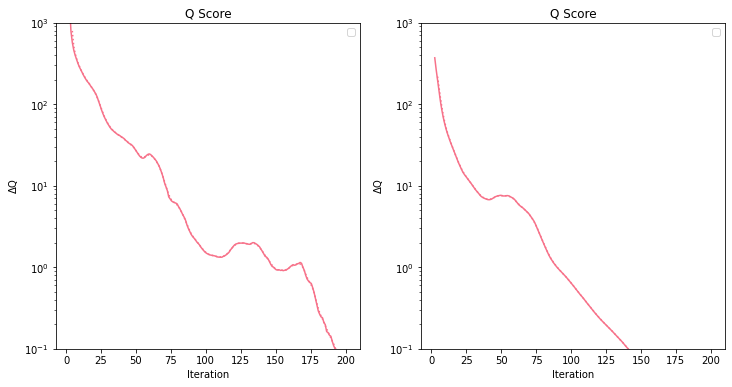

In [45]:
# Prior to downstream analysis, we should make sure the models have converged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
STARmap_spatial_result.plot_convergence(axes[0], label='SpiceMix', c='C0')
STARmap_nmf_result.plot_convergence(axes[1], label='NMF', c='C0')

In [46]:
# Load latent states for all cells estimated by the last iteration of SpiceMix/NMF
STARmap_spatial_result.load_latent_states(iiter=-1)
STARmap_nmf_result.load_latent_states(iiter=-1)

Iteration -1
Iteration -1


/work/magroup/shahula/spicemix_revision/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:116: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


optimal K = 8
#clusters = 8, #-1 = 0
optimal K = 11
#clusters = 11, #-1 = 0


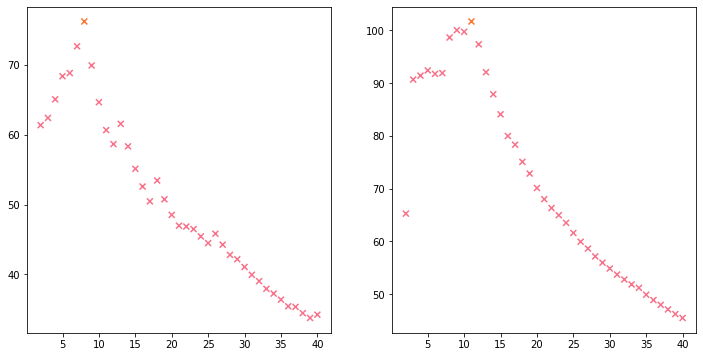

In [47]:
# Do hierarchical clustering on ALL cells in the latent space
# TODO: accelerate this function for datasets of 10k+ cells 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
STARmap_spatial_result.determine_optimal_clusters(axes[0], K_range=np.arange(2, 41))
STARmap_nmf_result.determine_optimal_clusters(axes[1], K_range=np.arange(2, 41))

In [48]:
STARmap_spatial_result.determine_clusters(16)
STARmap_nmf_result.determine_clusters(16)

array([11,  7,  0,  9, 11,  8,  0, 10,  8, 12, 15,  6,  0,  6,  9, 11, 11,
        4,  7,  9,  0,  7,  5,  2,  0,  4,  6,  0, 15,  4,  7,  2,  6,  1,
        4,  8,  5,  9,  9,  4,  9, 10,  2,  0,  6,  6,  8, 10,  9,  1, 15,
        4,  2,  3,  4,  0,  5,  1,  4,  9,  6,  2,  9, 11, 14,  5,  6,  0,
       12,  6,  9,  9,  1,  7,  5,  7, 15,  6,  3,  4,  6,  9,  6, 14, 13,
        2,  9,  4,  6, 13,  8,  4,  7,  4, 11,  5,  2, 11,  5,  9,  9,  4,
        6,  4,  9,  6, 13, 15,  4,  4,  0, 12,  8,  9, 12,  6, 12, 13, 12,
       15,  0,  5,  6,  8, 13, 13, 12,  5, 11,  4,  6,  1,  4,  8,  1,  9,
        8, 11,  3,  1,  9, 15,  4,  4, 12,  4,  4,  9,  0, 12, 12,  4,  4,
        2,  3,  6, 13,  0,  0,  2,  0,  8,  4,  6,  1,  5,  3,  4,  6,  5,
        4,  4, 11,  5,  6,  9,  0,  0,  9,  5,  8,  6, 10,  6, 12,  5,  8,
       13,  5,  4,  4,  9,  1, 15,  1,  7,  5, 13,  0, 12, 14,  2,  0,  6,
        0,  6,  8,  8,  9,  1, 10,  4,  8,  5, 10,  9,  5, 12,  3,  9,  8,
        0,  4, 11, 10, 13

In [49]:
print(STARmap_spatial_result.calculate_ari_score())
print(STARmap_nmf_result.calculate_ari_score())

0.3662222848527837
0.5529660027334778


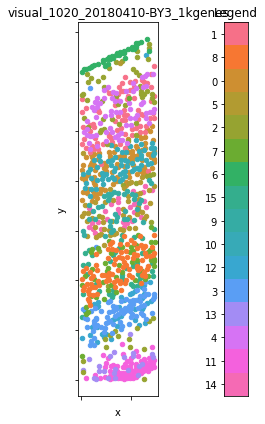

In [50]:
plot_height = int(np.sqrt(STARmap_spatial_result.num_repli))
plot_width = STARmap_spatial_result.num_repli // plot_height

if plot_height * plot_width < STARmap_spatial_result.num_repli + 1:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_height * 4, plot_width * 3), squeeze=False)
STARmap_spatial_result.plot_multireplicate(axes, "cluster")

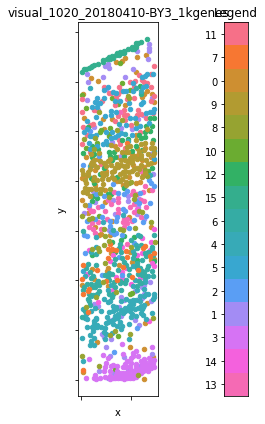

In [51]:
plot_height = int(np.sqrt(STARmap_nmf_result.num_repli))
plot_width = STARmap_nmf_result.num_repli // plot_height

if plot_height * plot_width < STARmap_nmf_result.num_repli + 1:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_height * 4, plot_width * 3), squeeze=False)
STARmap_nmf_result.plot_multireplicate(axes, "cluster")

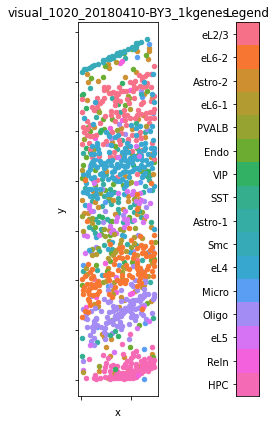

In [52]:
plot_height = int(np.sqrt(STARmap_nmf_result.num_repli))
plot_width = STARmap_nmf_result.num_repli // plot_height

if plot_height * plot_width < STARmap_nmf_result.num_repli + 1:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_height * 4, plot_width * 3), squeeze=False)
STARmap_nmf_result.plot_multireplicate(axes, "label")

In [10]:
replicate = 0

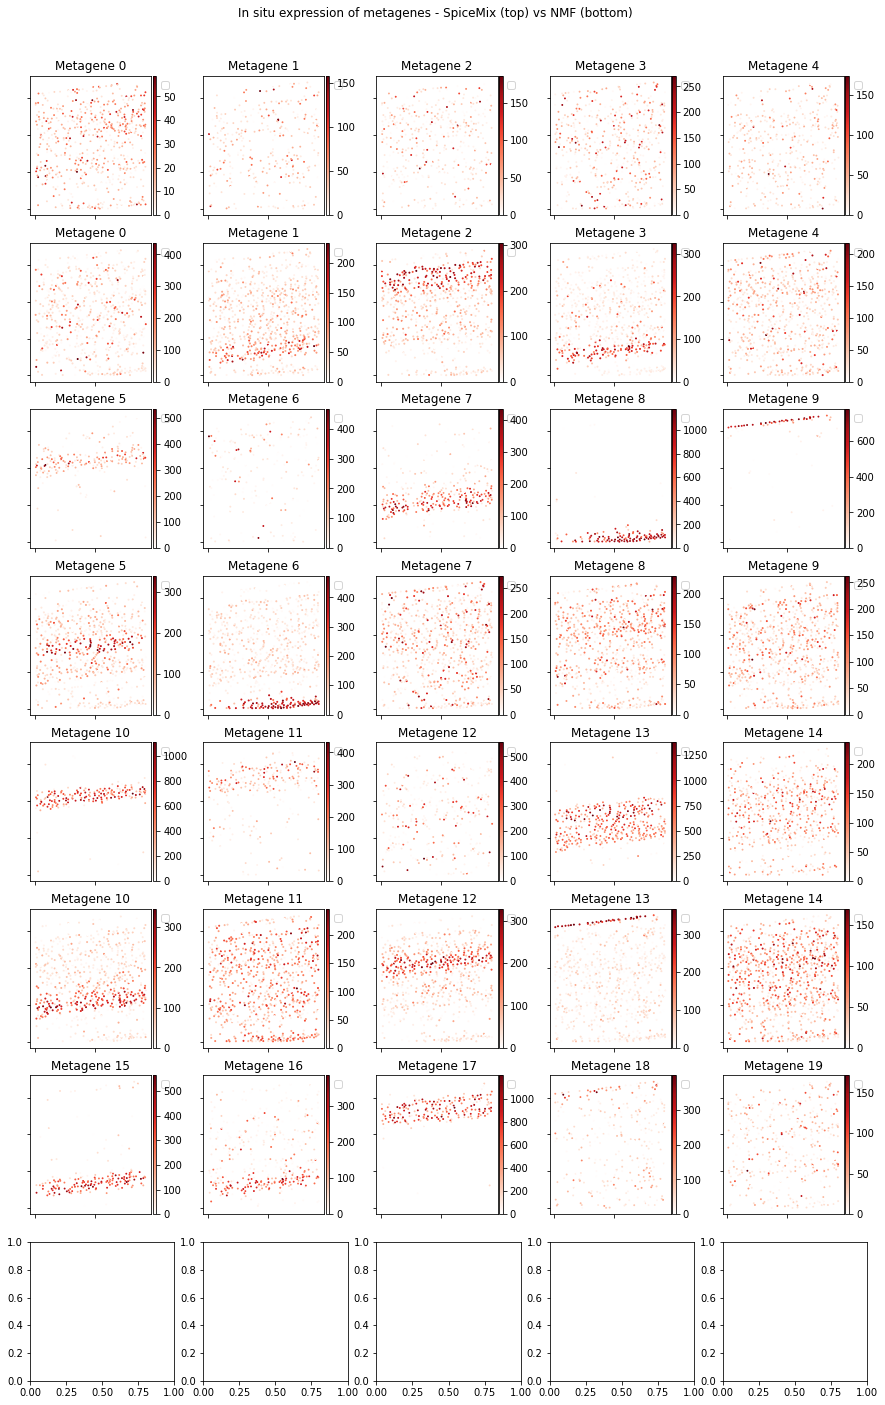

In [20]:
# We ovrlap latent states on the spatial space
# SpiceMix metagenes are expected to show clearer spatial patterns with less background expressions
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cmap = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

plot_height = 8
plot_width = 5
fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 3, plot_height * 3))
fig.suptitle('In situ expression of metagenes - SpiceMix (top) vs NMF (bottom)', y=.92)
STARmap_spatial_result.plot_metagenes(axes[[0, 2, 4, 6]], cmap=cmap, replicate=replicate, s=0.8)
STARmap_nmf_result.plot_metagenes(axes[[1, 3, 5, 7]], s=1, cmap=cmap, replicate=replicate)
plt.show()

In [21]:
# do dimensionality reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
STARmap_spatial_result.UMAP(**kwargs)
STARmap_nmf_result.UMAP(**kwargs)

Text(0.5, 1.0, 'Replicates')

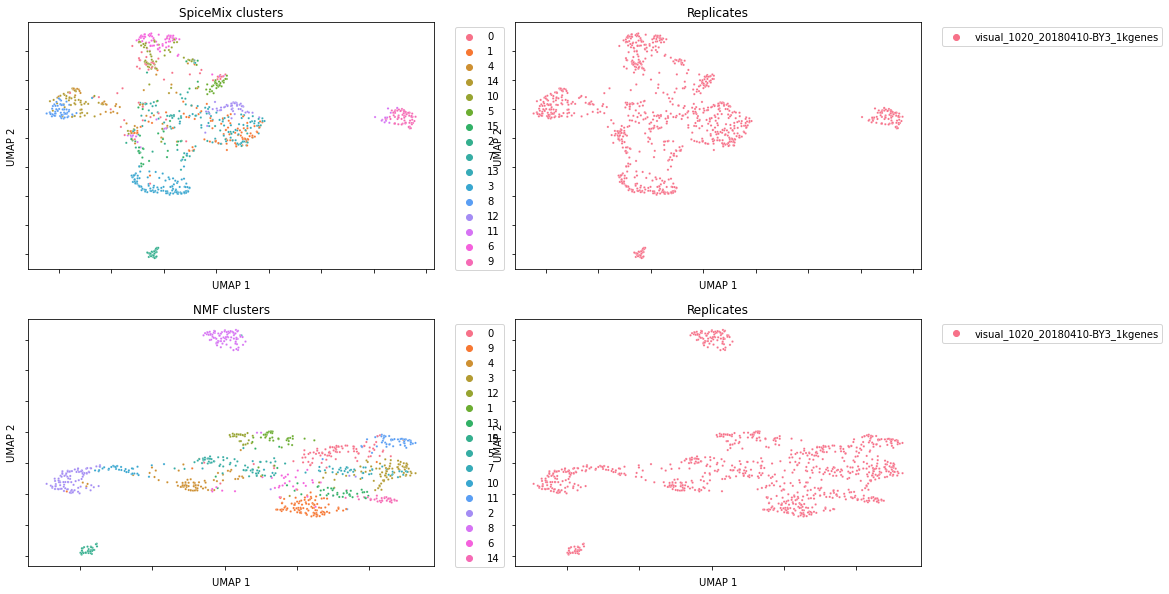

In [22]:
# Visualize cells in the latent space colored by
#   SpiceMix/NMF clusters (cluster)
#   cell types from the original analysis (cell type)
#   replicates (repli)
# Result.visualizeFeaturesSpace is a wraper of Result.visualizeFeatureSpace and handles the custom order of metagenes
kwargs = dict(s=5)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
STARmap_spatial_result.plot_feature(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
STARmap_spatial_result.plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

STARmap_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
STARmap_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

axes[0, 0].set_title('SpiceMix clusters')
axes[0, 1].set_title('Replicates')
axes[1, 0].set_title('NMF clusters')
axes[1, 1].set_title('Replicates')

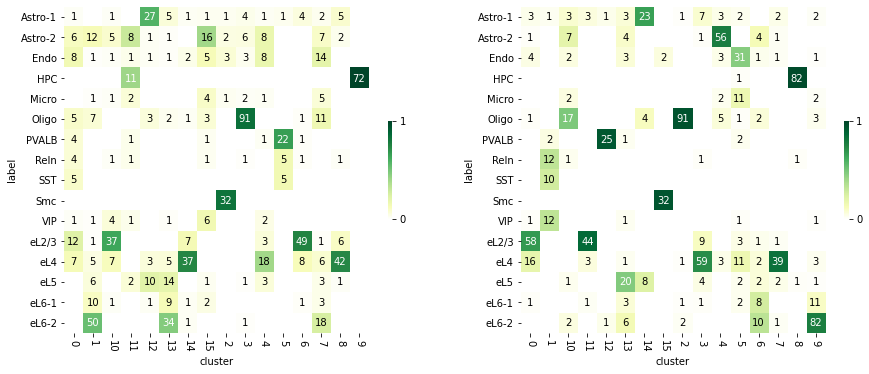

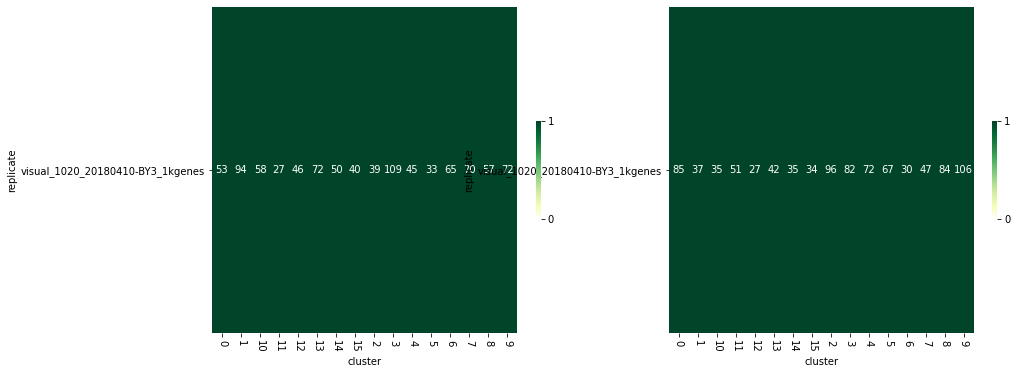

In [25]:
segmentdata = copy.deepcopy(plt.get_cmap('YlGn')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)


# spatial_cluster_order = ["12", "15", "7", "12", "14", "9", "7", "3", "2", "13", "8", "11", "0", "5", "6", "1"]

# compare SpiceMix/NMF clusters with the cell types from the original analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
STARmap_spatial_result.plot_categorical_overlap(axes[0], **kwargs)
STARmap_nmf_result.plot_categorical_overlap(axes[1], **kwargs)

# the distribution of SpiceMix/NMF clusters in different replicates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

STARmap_spatial_result.plot_categorical_overlap(axes[0], **kwargs, key_x='cluster', key_y='replicate', ignores_x={'NA'})
STARmap_nmf_result.plot_categorical_overlap(axes[1], **kwargs, key_x='cluster', key_y='replicate')

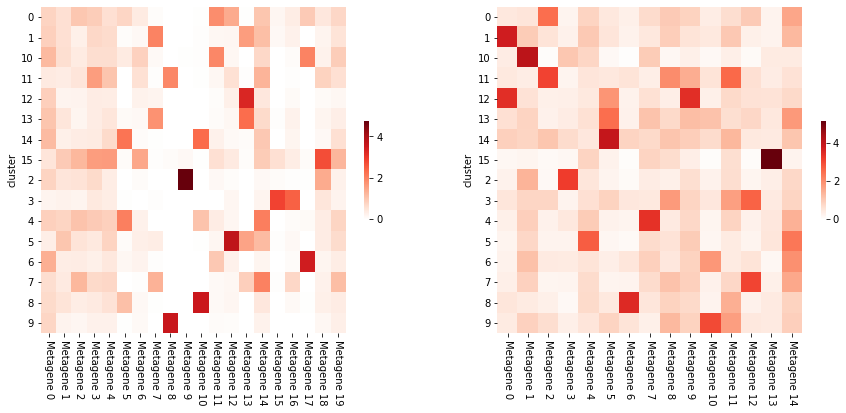

In [26]:
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
STARmap_spatial_result.visualizeFeatureEnrichment(
    axes[0], cmap=cm, ignores_y=['NA'],
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)
STARmap_nmf_result.visualizeFeatureEnrichment(
    axes[1], cmap=cm,
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)

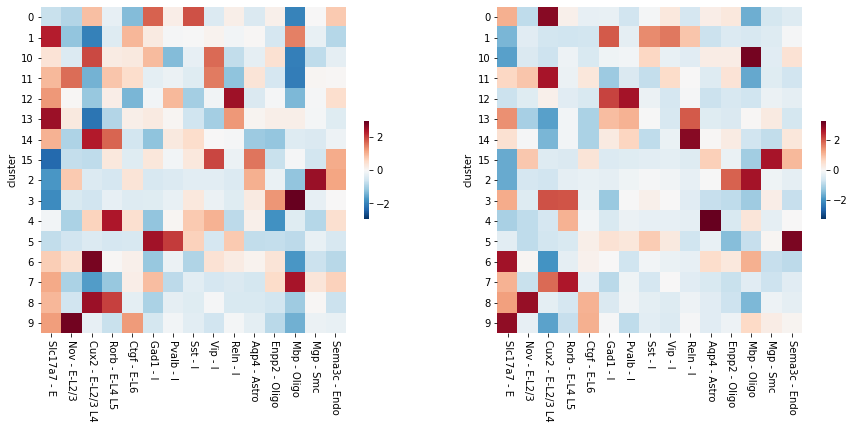

In [28]:
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

# In the first column are the gene IDs, and in the second column are annotations, 
#   which are cell types in this example
gene_list_plot = np.array([
    ('Slc17a7',	'E'), # putative marker of all excitatory neural types
    ('Nov',		'E-L2/3'), # STARmap, Fig. 2J
    ('Cux2',	'E-L2/3 L4'), # STARmap, Fig. 2J
    ('Rorb',	'E-L4 L5'), # STARmap, Fig. 2J
    ('Ctgf',	'E-L6'), # STARmap, Fig. 2J & tasic
    
    ('Gad1',	'I'), # putative marker of all inhibitory neural types
    ('Pvalb',	'I'), # putative marker of PVALB subtype
    ('Sst',		'I'), # putative marker of SST subtype
    ('Vip',		'I'), # putative marker of VIP subtype
    ('Reln',	'I'),
    
    ('Aqp4',	'Astro'), # tasic
    ('Enpp2',	'Oligo'), # STARmap Fig. S6B
    ('Mbp',		'Oligo'), # tasic
    ('Mgp',		'Smc'), # STARmap Fig. S6B
    ('Sema3c',	'Endo'), # STARmap Fig. S6B
])
# Extract gene IDs and prepend string 'expr '
keys_x = [f'{_[0]}' for _ in gene_list_plot]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
STARmap_spatial_result.visualizeFeatureEnrichment(
    axes[0], keys_x=keys_x, **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
STARmap_nmf_result.visualizeFeatureEnrichment(
    axes[1], keys_x=keys_x, **kwargs,
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
for ax in axes:
    ax.set_xticklabels(' - '.join(_) for _ in gene_list_plot)

In [29]:
# plot the empirical affinity between cell types
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for channel in ['red', 'green', 'blue']:
    segmentdata[channel] = [(1.-i, k, j) for (i, j, k) in segmentdata[channel][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityClusters(axes[0], ignores={'NA'}, **kwargs)
obj_NMF     .plotAffinityClusters(axes[1], ignores={'NA'}, **kwargs)

NameError: name 'matplotlib' is not defined

In [8]:
def calculate_empirical_affinity_matrix(adjacency_lists, embeddings):
    """Calculate empirical correlations between metagenes in neighbors for an embedding.
    
    Args:
        adjacency_lists: an adjacency list representation of the cell neighborhood graph, i.e.
            a dictionary with key = cell_id and value = [neighbor_id for neighbor_id in neighbor_ids]
        embeddings: a (num_cells x num_metagenes) array of embeddings
        
    Returns:
        An empirical metagene-neighbor affinity matrix of shape (num_metagenes x num_metagenes)
    """
    
    num_cells, num_metagenes = embeddings.shape
    embeddings /= embeddings.sum(axis=1, keepdims=True)

    empirical_spicemix_affinities = np.zeros((num_metagenes, num_metagenes))
    empirical_matches = [[[] for _ in range(num_metagenes)] for _ in range(num_metagenes)]
    
    for cell, adjacency_list in adjacency_lists.items():
        cell = int(cell)
        cell_embedding = embeddings[cell]
        # average_adjacent_embedding = embeddings[adjacency_list].mean(axis=0)
        for adjacent_cell in adjacency_list:
            adjacent_embedding = embeddings[adjacent_cell]
            for first_metagene in range(num_metagenes):
                for second_metagene in range(first_metagene, num_metagenes):
                    match = cell_embedding[first_metagene], adjacent_embedding[second_metagene]
                    empirical_matches[first_metagene][second_metagene].append(match)

    for first_metagene in range(num_metagenes):
        for second_metagene in range(first_metagene, num_metagenes):
            x, y = np.array(empirical_matches[first_metagene][second_metagene]).T
            empirical_spicemix_affinities[first_metagene][second_metagene], _ = pearsonr(x, y)

    empirical_spicemix_affinities += empirical_spicemix_affinities.T - np.diag(np.diag(empirical_spicemix_affinities))
    
    return empirical_spicemix_affinities

In [15]:
adjacency_lists = STARmap_spatial_result.dataset["Es"][replicate]

embeddings = STARmap_spatial_result.data[STARmap_spatial_result.weight_columns].values
embeddings /= embeddings.sum(axis=1, keepdims=True)
     
empirical_spicemix_affinities = calculate_empirical_affinity_matrix(adjacency_lists, embeddings)

In [16]:
adjacency_lists = STARmap_nmf_result.dataset["Es"][replicate]

embeddings = STARmap_nmf_result.data[STARmap_nmf_result.weight_columns].values
embeddings /= embeddings.sum(axis=1, keepdims=True)

empirical_nmf_affinities = calculate_empirical_affinity_matrix(adjacency_lists, embeddings)

Text(0.5, 1.0, 'NMF Empirical Metagene Correlation')

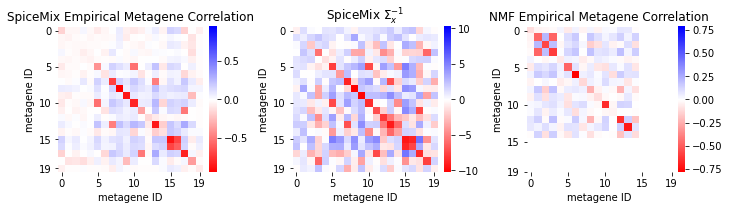

In [17]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

empirical_metagene_correlations = STARmap_spatial_result.calculate_metagene_correlations("visual_1020_20180410-BY3_1kgenes", STARmap_spatial_result.data, STARmap_spatial_result.weight_columns)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
STARmap_spatial_result.plot_metagene_heatmap(axes[0], -empirical_spicemix_affinities.astype(float), cmap=cm)
STARmap_spatial_result.plot_affinity_metagenes(axes[1], cmap=cm)
STARmap_spatial_result.plot_metagene_heatmap(axes[2], -empirical_nmf_affinities.astype(float), cmap=cm)

# axes[0].plot(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
# axes[1].plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

# STARmap_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
# STARmap_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

plt.tight_layout()
axes[0].set_title('SpiceMix Empirical Metagene Correlation')
axes[1].set_title('SpiceMix $\Sigma_x^{-1}$')
axes[2].set_title('NMF Empirical Metagene Correlation')